In [1]:
# 주택 가격예측
# 머신러닝, 프로세스, 지도학습, 사이킷런 데이터셋, 분석평가 지표
# 데이터 사이킷런에 내장된 데이터
# boston.DESCR
# 서형 모델을 구축
# 이걸 우리분석했던 데이터셋에 반영할수 있는지 여부(판단) - 적용. 월요일 발표..

In [2]:
# 머신러닝(기계학습) 프로세스
# 데이터 수집(확보) - > 전처리(EDA, 데이터분할) ->훈련(학습) -> 모델 -> 평가(예측한값/실제값)->적용(현장)

In [3]:
# 지도학습 - 정답을 주고 학습 - 예측(값), 분류(종류) 
# 비지도학습 - 정답을 안가르쳐주고 학습(데이터만 던지고 알아서 해라..) -> 군집

In [4]:
# 입력 : 예측변수,  속성 , 특징
# 출력 : 반응변수, 목표변수, 클래스, 레이블    

In [5]:
# 머신러닝(기계학습) - 독립변수의 개수 차수.... iris , titanic  ,  2천500만개의 파라메터를 사용

In [6]:
# 사이킷런... 데이터셋  data, target

In [7]:
# 모델로 예측한 값과 실제값의 차이... 평가지표
# MAE / MSE / RMSE/ R2(결정계수)


In [8]:
!pip install sklearn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.datasets import load_boston

In [11]:
boston = load_boston()

C:\Users\user\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [12]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [13]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
boston_df['PRICE'] =  boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
from sklearn.linear_model import LinearRegression  # 회귀..
from sklearn.model_selection import train_test_split # 데이터를 8:2  7:3 섞어준다
from sklearn.metrics import mean_squared_error, r2_score 

In [19]:
x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]

In [20]:
x.shape,  y.shape

((506, 13), (506,))

In [21]:
# 학습용과 테스트용 데이터 분리
x_train,x_test,y_train,y_test =  train_test_split(x,y,train_size=0.7,random_state=32)

In [22]:
# 학습데이터  x_train, y_train
# 테스트 x_test, y_test

In [23]:
x_train.shape, x_test.shape

((354, 13), (152, 13))

In [24]:
# 객체생성 ->훈련(fit)->예측(predict)->평가->적용

In [25]:
# 객체생성 사이킷런의 모델의 대한객체
lr =  LinearRegression()  # 생성자 
# 훈련
lr.fit(x_train,y_train)  # -- 모델생성

LinearRegression()

In [26]:
# 예측
predict = lr.predict(x_test)

In [27]:
# x_test  실제 정답과 머신러닝이 예측한 답

In [28]:
x_test.iloc[[0]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28


In [29]:
 y_test.iloc[0], round(predict[0],1)

(14.8, 15.0)

In [30]:
mean = mean_squared_error(y_test,predict)
rmean = np.sqrt(mean)
print(mean)
print(rmean)

25.907368930677375
5.089928185218076


In [31]:
print(f"절편 : {lr.intercept_}")
print(f"기울기 : {np.round(lr.coef_,2)}")

절편 : 35.30466272850476
기울기 : [-1.20e-01  4.00e-02  2.00e-02  1.39e+00 -1.74e+01  3.90e+00 -0.00e+00
 -1.38e+00  3.00e-01 -1.00e-02 -9.80e-01  1.00e-02 -4.90e-01]


In [32]:
predict[0]

14.995334773468745

In [33]:
x_test.iloc[0]

CRIM         0.95577
ZN           0.00000
INDUS        8.14000
CHAS         0.00000
NOX          0.53800
RM           6.04700
AGE         88.80000
DIS          4.45340
RAD          4.00000
TAX        307.00000
PTRATIO     21.00000
B          306.38000
LSTAT       17.28000
Name: 27, dtype: float64

In [34]:
lr.coef_

array([-1.16988161e-01,  4.41711887e-02,  2.27251962e-02,  1.39322382e+00,
       -1.74020793e+01,  3.89692284e+00, -1.94889880e-03, -1.38322998e+00,
        3.02969054e-01, -1.21165085e-02, -9.75914913e-01,  1.02316261e-02,
       -4.85207929e-01])

In [35]:
# 중요 feature(컬럼) 순으로 시각화... 

In [36]:
datas = {
    'x' : x_train.columns,
    'y' : np.abs(lr.coef_)
}
temp = pd.DataFrame( datas)
temp = temp.sort_values(by='y',ascending=False)
temp.head()
# 공해가 적고,방이많고, 찰스강이 보이면서, 도로접근성이좋고, 단지가형성,주택가  --> 주택가격이 높다


,x,y
4,NOX,17.402079
5,RM,3.896923
3,CHAS,1.393224
7,DIS,1.383230
10,PTRATIO,0.975915


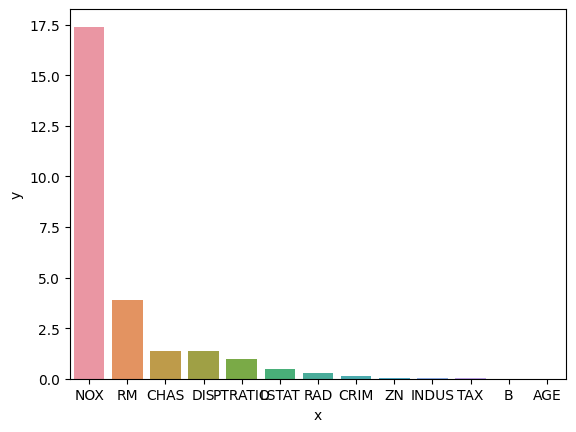

In [37]:
sns.barplot(data=temp,x='x',y ='y')
plt.show()

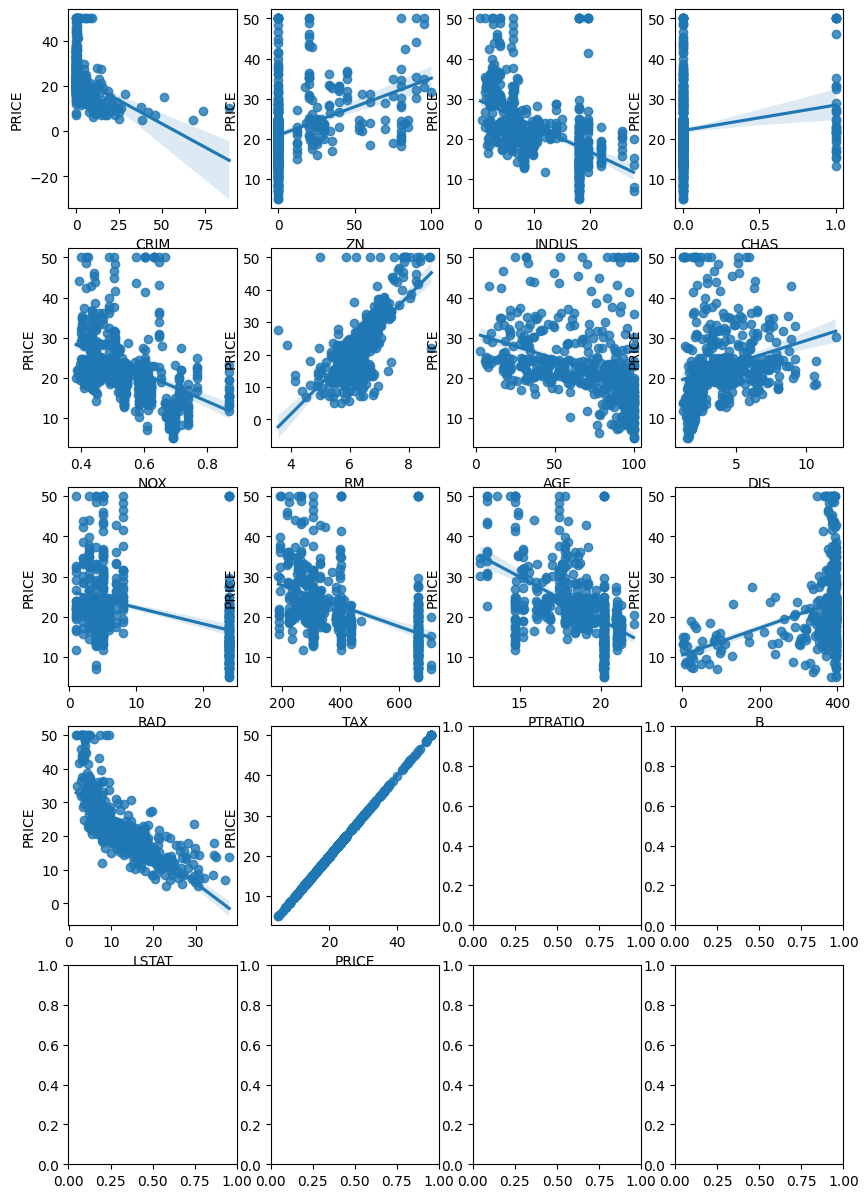

In [38]:
# 각 컬럼에 대한 regplot으로 y = 가격으로 해서 시각화
fig,ax =  plt.subplots(5,4,figsize=(10,15))
for idx,value in enumerate(boston_df.columns):
    sns.regplot(data=boston_df, x=value ,y='PRICE', ax = ax[idx // 4, idx % 4])
plt.show()    

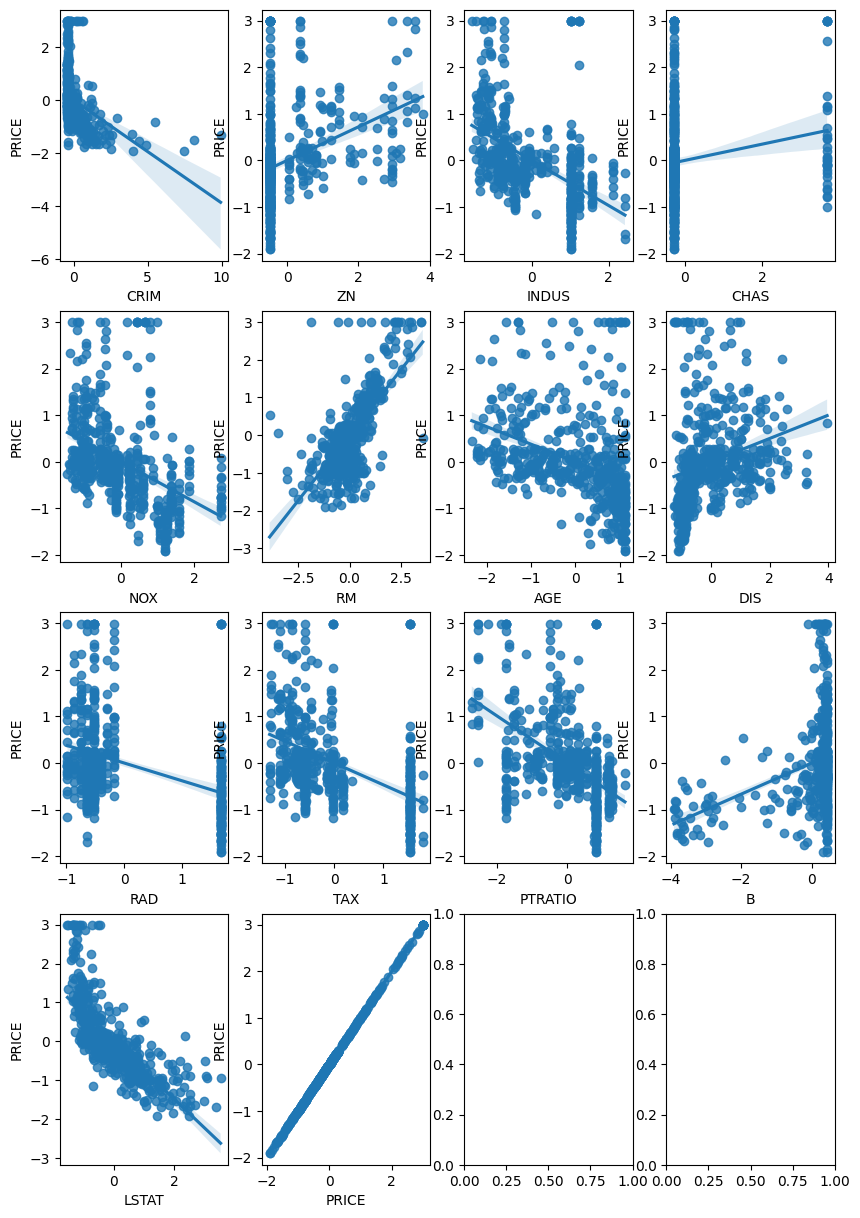

In [39]:
from sklearn.preprocessing import StandardScaler
ss =  StandardScaler()
temp = ss.fit_transform(boston_df)
temp = pd.DataFrame(temp,columns=boston_df.columns)
temp.describe()


fig,ax =  plt.subplots(4,4,figsize=(10,15))
for idx,value in enumerate(temp.columns):
    sns.regplot(data=temp, x=value ,y='PRICE', ax = ax[idx // 4, idx % 4])    
plt.show() 


In [40]:
#  보스턴 주택 가격 예측하기
x_test.iloc[0]
# 



CRIM         0.95577
ZN           0.00000
INDUS        8.14000
CHAS         0.00000
NOX          0.53800
RM           6.04700
AGE         88.80000
DIS          4.45340
RAD          4.00000
TAX        307.00000
PTRATIO     21.00000
B          306.38000
LSTAT       17.28000
Name: 27, dtype: float64

In [41]:
# auto MPG Data set

In [42]:
df = pd.read_csv('auto-mpg.data.csv')
df.columns =  df.columns.str.replace(" ","_")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [43]:
# 데이터 수집 - >전처리 -> 모델

In [44]:
df = df[df.horsepower != '?']

In [45]:
# 직관적으로 컬럼제거 가능하면 제거
# origin은 범주형인데.. 3가지밖에 없고 더군다나 편차가 심해서 적절하지 않다고 판단.
# 연비에 자동차 이름은 관련없다고 주관적으로판단
x = df.iloc[:,1:-2]
y = df.iloc[:,0]

In [46]:
# 변수들간의 상관관계를 보고 두 변수들끼리 관계가 강하면 둘중에 하나만 채택
x.corr()

,cylinders,displacement,weight,acceleration,model_year
cylinders,1.000000,0.950823,0.897527,-0.504683,-0.345647
displacement,0.950823,1.000000,0.932994,-0.543800,-0.369855
weight,0.897527,0.932994,1.000000,-0.416839,-0.309120
acceleration,-0.504683,-0.543800,-0.416839,1.000000,0.290316
model_year,-0.345647,-0.369855,-0.309120,0.290316,1.000000


<AxesSubplot:xlabel='weight', ylabel='mpg'>

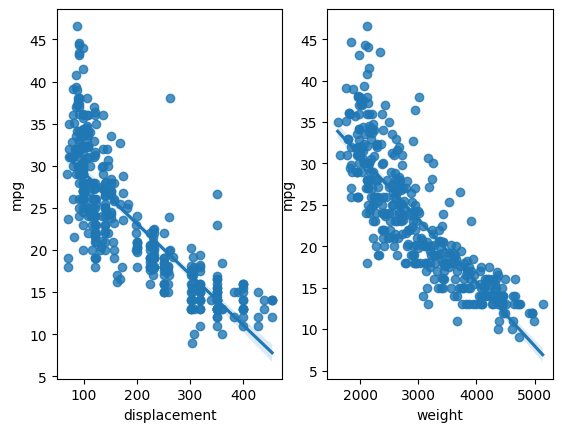

In [47]:
# 둘중에 누굴 분석데이터로 사용할 것인지( 편차도 적고, 데이터도 다양하고, 독립변수와 상관관계가 높은)
# displacement, weight  들이 연비와 어떤 관계
fig,ax = plt.subplots(1,2)
sns.regplot(data=df, x='displacement', y='mpg', ax=ax[0])
sns.regplot(data=df, x='weight', y='mpg', ax=ax[1])

<AxesSubplot:xlabel='weight', ylabel='mpg'>

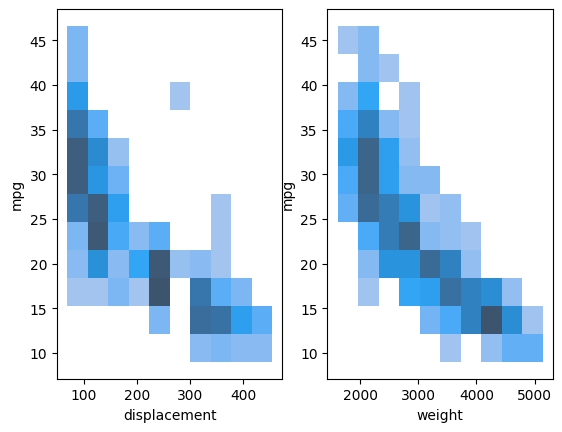

In [48]:
fig,ax = plt.subplots(1,2)
sns.histplot(data=df,x='displacement',y='mpg', ax=ax[0],kde=True)
sns.histplot(data=df,x='weight',y='mpg', ax=ax[1],kde=True)

<AxesSubplot:xlabel='weight', ylabel='Count'>

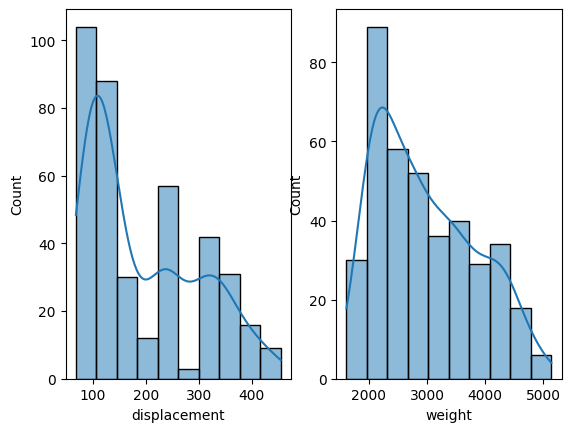

In [49]:
fig,ax = plt.subplots(1,2)
sns.histplot(data=df,x='displacement',ax=ax[0],kde=True)
sns.histplot(data=df,x='weight',ax=ax[1],kde=True)

In [50]:
# displacement 하고 cylinders를 제외
x = x.iloc[:,2:]
# x['horsepower'] = x['horsepower'].apply(lambda x: int(x))
x


,horsepower,weight,acceleration,model_year
0,130,3504,12.0,70
1,165,3693,11.5,70
2,150,3436,11.0,70
3,150,3433,12.0,70
4,140,3449,10.5,70
...,...,...,...,...
393,86,2790,15.6,82
394,52,2130,24.6,82
395,84,2295,11.6,82
396,79,2625,18.6,82


In [53]:
x['horsepower'] = x['horsepower'].astype(int)

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   horsepower    392 non-null    int32  
 1   weight        392 non-null    int64  
 2   acceleration  392 non-null    float64
 3   model_year    392 non-null    int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 13.8 KB


In [56]:
x.shape, y.shape

((392, 4), (392,))

In [65]:
x = df.iloc[:,1:-1]

In [66]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=32)

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
predict = lr.predict(x_test)

In [69]:
mse = mean_squared_error(predict,y_test)
mse

12.016820266580835

In [70]:
r2 = np.sqrt(mse)
r2

3.4665285613392594

In [71]:
# accuracy  정답비율
lr.score(x_test,y_test)

0.7876924916865025